# Model benchmark comparison - Matzen et al. (2017)
This compares the model results shown in the paper with those calculated from the same underlying data using the pyMelt functions. The data is taken from the Nature paper.

Import required packages:

In [1]:
import pyMelt as m
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Read in the data table:

In [2]:
d = pd.read_csv('matzen2017nature.csv')

d.head()

,Reference,Apparatus,Capsule,Run #,T(C),P(kb),melt,olivine,opx,cpx,...,Fe2O3 sp,SiO2 gt,TiO2 gt,Al2O3 gt,Cr2O3 gt,FeO* gt,MnO gt,MgO gt,CaO gt,Na2O gt
0,Baker & Stolper (1994),PC,gr/Pt,70a,1250,10,0.017,0.547,0.248,0.167,...,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Baker & Stolper (1994),PC,gr/Pt,55a,1270,10,0.088,0.564,0.216,0.120,...,1.294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Baker & Stolper (1994),PC,gr/Pt,20,1270,10,0.083,0.560,0.220,0.123,...,1.612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Baker & Stolper (1994),PC,gr/Pt,15,1280,10,0.115,0.571,0.203,0.099,...,1.110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Baker & Stolper (1994),PC,gr/Pt,16,1300,10,0.151,0.579,0.194,0.069,...,2.357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Ni Ol-Liq

The spreadsheet lists only $D$ and not $K_d$:

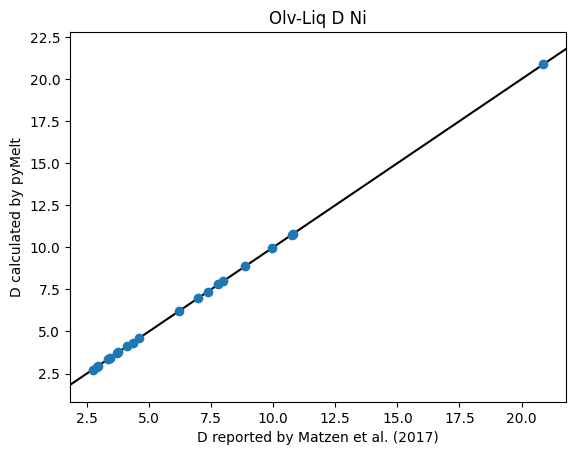

In [3]:
calc_D = []

for i, row in d.iterrows():
    if row['DNi ol-liq'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        calc_kd = m.chemistry.matzen.kd_olvliq_Ni(state)
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, calc_kd, liq_MgO=row['MgO gl'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)

f, a = plt.subplots()
a.scatter(d['DNi ol-liq'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Liq D Ni')

plt.show()




## Ni Ol-Opx

Both $K_D$ and $D$ are provided:

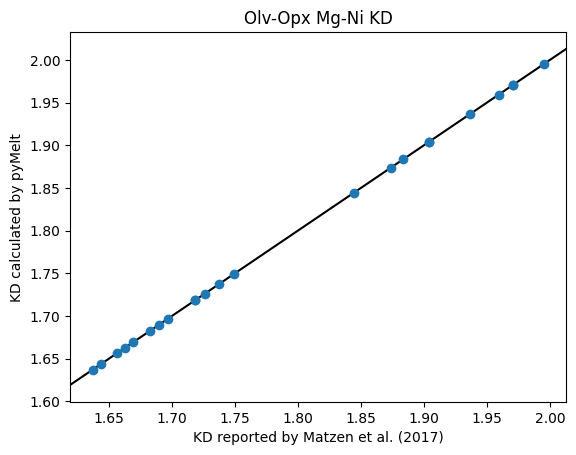

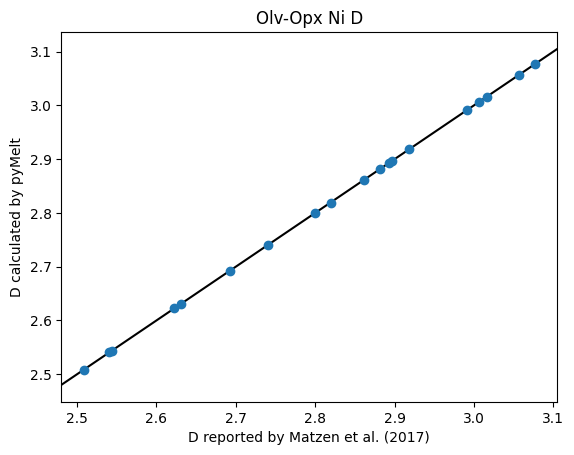

In [4]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['KD ol-opx, Ni-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvopx_Ni(state)
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Ni(state)
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO opx'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['KD ol-opx, Ni-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Opx Mg-Ni KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Ni ol-opx'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Opx Ni D')
plt.show()

## Ni Ol-Cpx

Both $K_D$ and $D$ are provided:

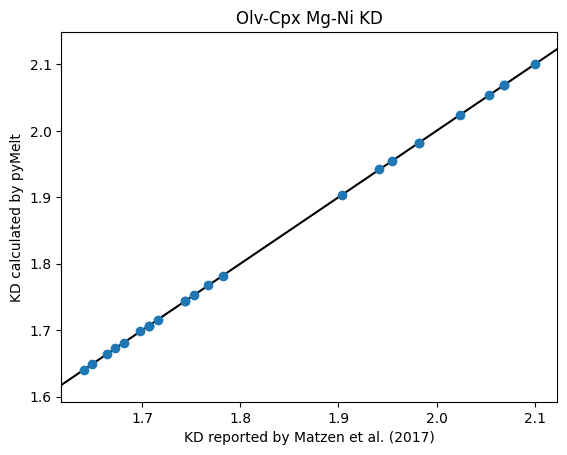

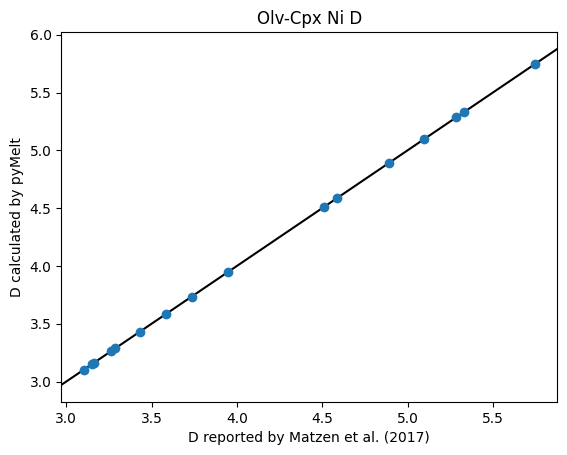

In [5]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['KD ol-cpx, Ni-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvcpx_Ni(state)
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Ni(state)
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO cpx'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['KD ol-cpx, Ni-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Cpx Mg-Ni KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Ni ol-cpx'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Cpx Ni D')
plt.show()

## Ni Olv-Spn

Both $K_D$ and $D$ are provided. Note that the modelled compositions in the paper were calculated assuming Fe$_2$O$_3$ was 0.0.

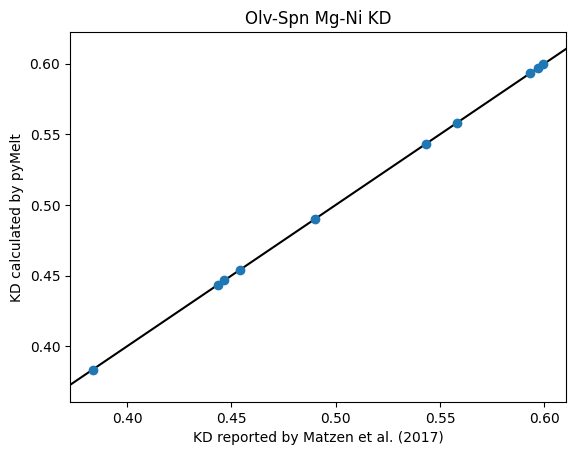

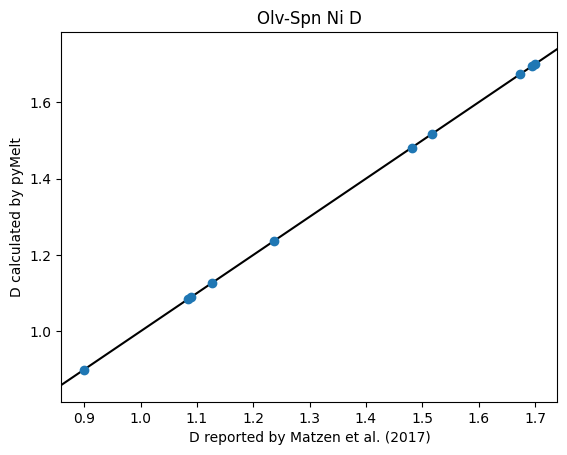

In [6]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['KD ol-sp, Ni-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvspn_Ni(state, spn_Cr2O3=row['Cr2O3 sp'],
                                             spn_Al2O3=row['Al2O3 sp'], spn_Fe2O3=0.0) #row['Fe2O3 sp'])
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Ni(state)
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO sp'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['KD ol-sp, Ni-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Spn Mg-Ni KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Ni ol-sp'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Spn Ni D')
plt.show()

## Ni Olv-Gnt

$K_D$ and $D$ provided:

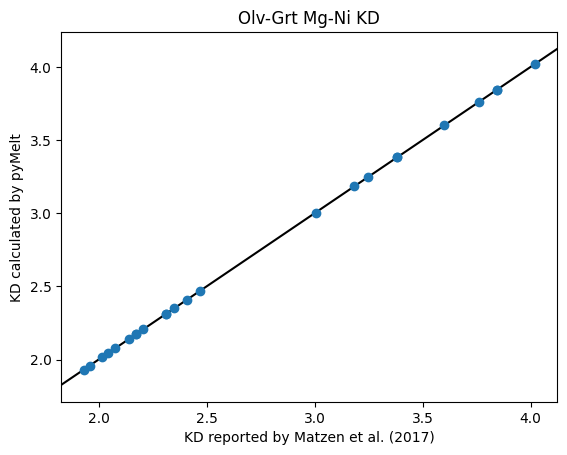

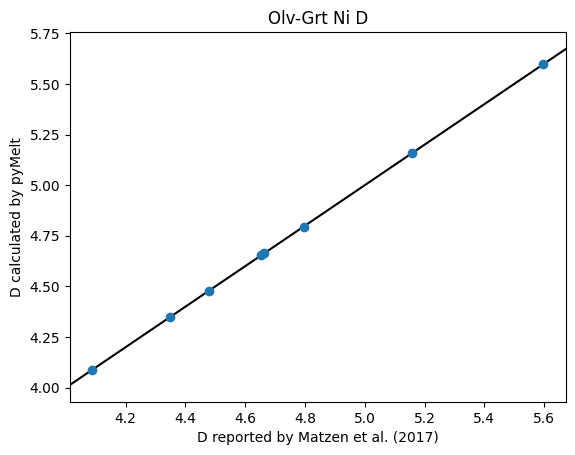

In [7]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['KD ol-gt, Ni-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvgrt_Ni(state)
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Ni(state)
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO gt'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['KD ol-gt, Ni-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Grt Mg-Ni KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Ni ol-gt'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Grt Ni D')
plt.show()

## Olv-Liq


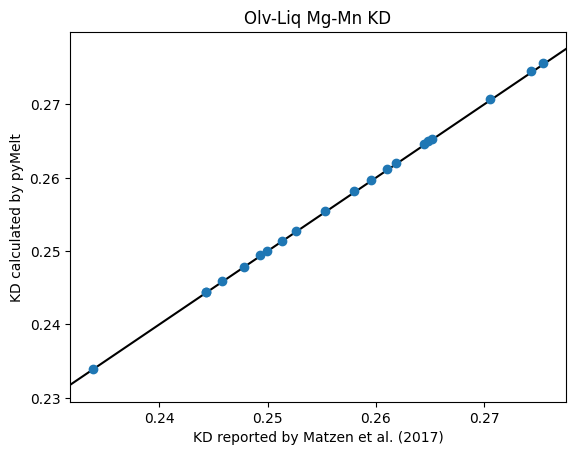

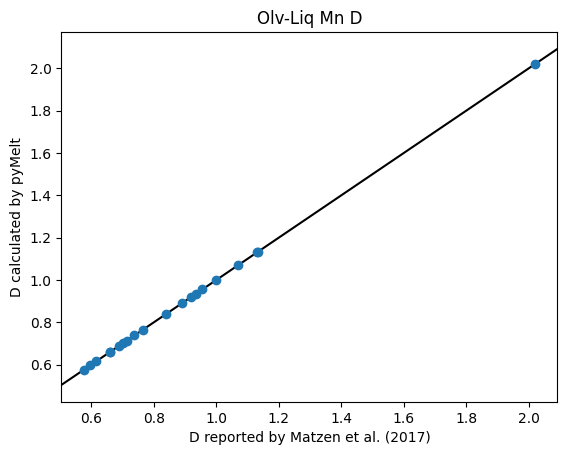

In [8]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['Ol-liq KDMn-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvliq_Mn(state, liq_MgO=row['MgO gl'])
        calc_kd.append(kd)
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO gl'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['Ol-liq KDMn-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Liq Mg-Mn KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['DMn ol-liq'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Liq Mn D')
plt.show()

## Ol-Opx


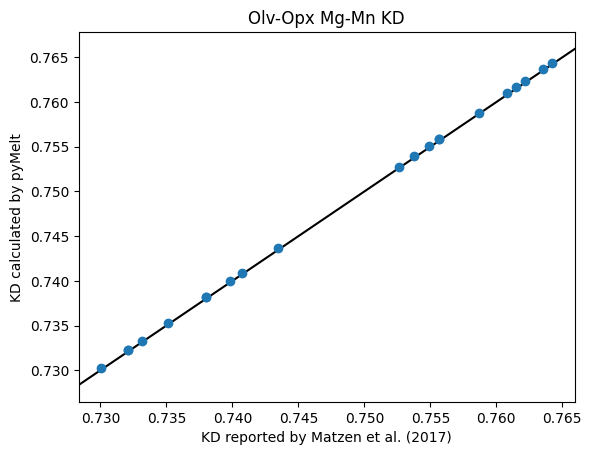

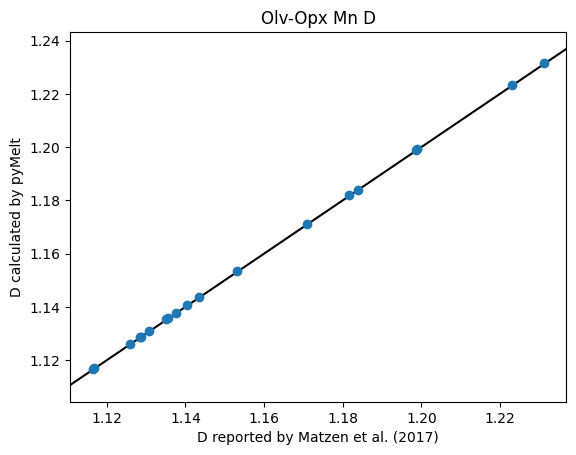

In [9]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['ol-opx KD Mn-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvopx_Mn(state)
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Mn(state, liq_MgO=row['MgO gl'])
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO opx'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['ol-opx KD Mn-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Opx Mg-Mn KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Mn ol-opx'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Opx Mn D')
plt.show()

## Olv-Cpx

$D$ is calculated directly for cpx:

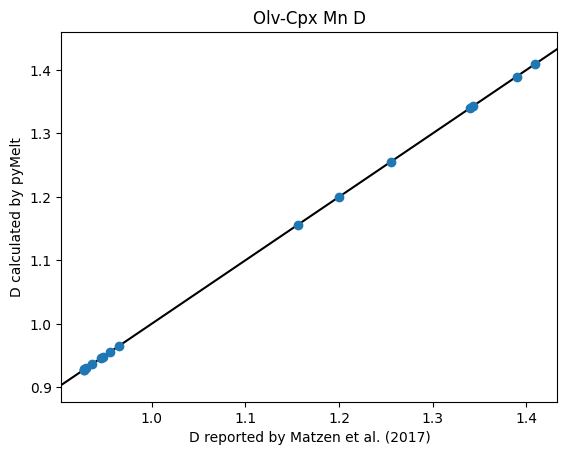

In [10]:
calc_D = []

for i, row in d.iterrows():
    if row['D Mn ol-cpx'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        calc_D.append(m.chemistry.matzen.D_olvcpx_Mn(state, cpx_CaO=row['CaO cpx']))
    else:
        calc_D.append(np.nan)

f, a = plt.subplots()
a.scatter(d['D Mn ol-cpx'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Cpx Mn D')
plt.show()

## Olv - Spn

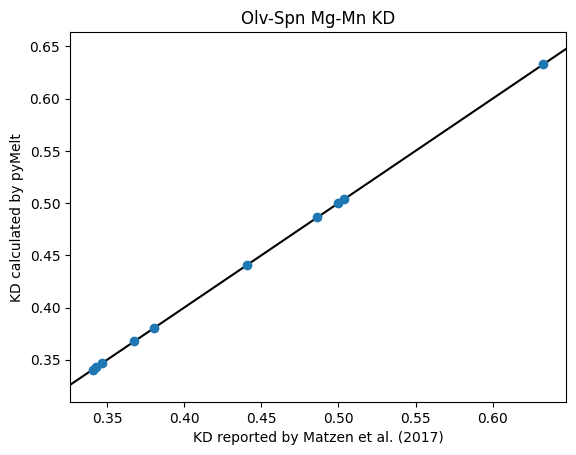

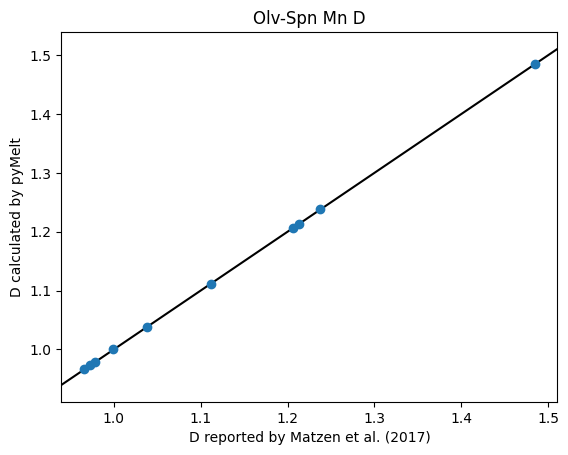

In [11]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['ol-sp KD Mn-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvspn_Mn(state, spn_Cr2O3=row['Cr2O3 sp'],
                                             spn_Al2O3=row['Al2O3 sp'], spn_Fe2O3=row['Fe2O3 sp'])
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Mn(state, liq_MgO=row['MgO gl'])
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO sp'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['ol-sp KD Mn-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Spn Mg-Mn KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Mn ol-sp'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Spn Mn D')
plt.show()

## Olv-Grt

There is a small discrepancy here. I am not sure why, but since it is small and within error of the fit it is unlikely to be important.

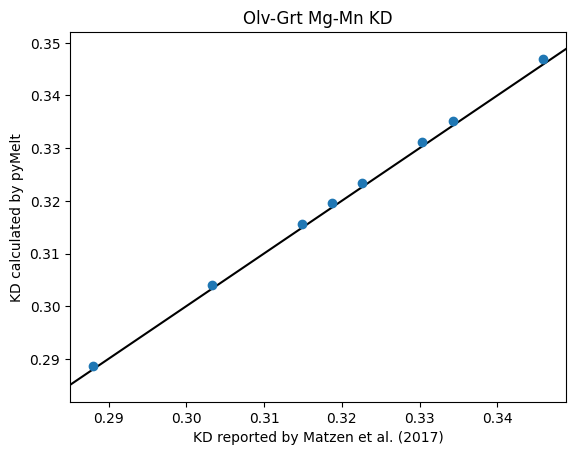

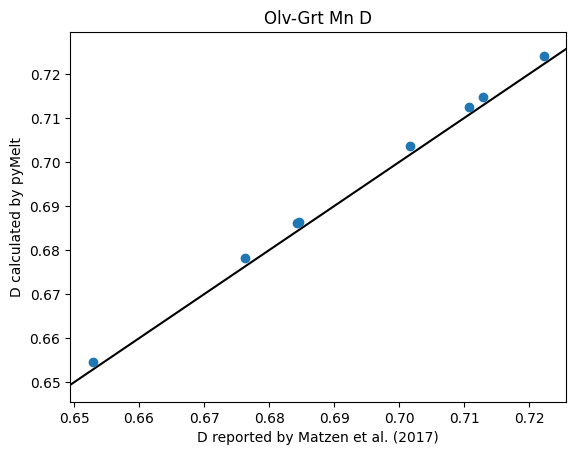

In [12]:
calc_kd = []
calc_D = []

for i, row in d.iterrows():
    if row['ol-gt KD Mn-Mg'] > 0:
        state = pd.Series({'T' : row['T(C)']})
        kd = m.chemistry.matzen.kd_olvgrt_Mn(state)
        calc_kd.append(kd)
        olv_kd = m.chemistry.matzen.kd_olvliq_Mn(state, liq_MgO=row['MgO gl'])
        # Non standard arguments since we are not matching liquid-mineral Ds
        calc_D.append(m.chemistry.matzen.D_from_kd(1.0, kd, liq_MgO=row['MgO gt'], mineral_MgO=row['MgO ol']))
    else:
        calc_D.append(np.nan)
        calc_kd.append(np.nan)

f, a = plt.subplots()
a.scatter(d['ol-gt KD Mn-Mg'], calc_kd)
a.set_xlabel('KD reported by Matzen et al. (2017)')
a.set_ylabel('KD calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Grt Mg-Mn KD')
plt.show()

f, a = plt.subplots()
a.scatter(d['D Mn ol-gt'], calc_D)
a.set_xlabel('D reported by Matzen et al. (2017)')
a.set_ylabel('D calculated by pyMelt')
a.set_xlim(a.get_xlim())
a.plot(a.get_xlim(), a.get_xlim(), c='k', zorder=0)
a.set_title('Olv-Grt Mn D')
plt.show()

In [13]:
m.chemistry.matzen?

Type:        module
String form: <module 'pyMelt.chemistry.matzen' from '/Users/sm905/repos/pyMelt/pyMelt/chemistry/matzen.py'>
File:        ~/repos/pyMelt/pyMelt/chemistry/matzen.py
Docstring:  
Chemistry - Matzen

This module provides the functions implementing the expressions for Mn and Ni partitioning
by Matzen et al. (2017).